# Import Dataset

In [1]:
### This file aims to implement the whole process of data mining
# First, we import libraries and the selected dataset
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

df = spark.read.csv('ChengduPM20100101_20151231.csv',header=True,inferSchema=True)

#  Data Understanding
###  Descirbe the data

In [2]:
# Check the number of rows and columns in the dataframe
print(df.head())
print("Total data points:", df.count())
df.show(1)

Row(No=1, year=2010, month=1, day=1, hour=0, season=4, PM_Caotangsi='NA', PM_Shahepu='NA', PM_US Post='NA', DEWP='4', HUMI='81.2', PRES='1022', TEMP='7', cbwd='cv', Iws='1', precipitation='0', Iprec='0')
Total data points: 52584
+---+----+-----+---+----+------+------------+----------+----------+----+----+----+----+----+---+-------------+-----+
| No|year|month|day|hour|season|PM_Caotangsi|PM_Shahepu|PM_US Post|DEWP|HUMI|PRES|TEMP|cbwd|Iws|precipitation|Iprec|
+---+----+-----+---+----+------+------------+----------+----------+----+----+----+----+----+---+-------------+-----+
|  1|2010|    1|  1|   0|     4|          NA|        NA|        NA|   4|81.2|1022|   7|  cv|  1|            0|    0|
+---+----+-----+---+----+------+------------+----------+----------+----+----+----+----+----+---+-------------+-----+
only showing top 1 row



In [3]:
# Print schema to visualise the data structure at a high level. 
df.printSchema()

root
 |-- No: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- season: integer (nullable = true)
 |-- PM_Caotangsi: string (nullable = true)
 |-- PM_Shahepu: string (nullable = true)
 |-- PM_US Post: string (nullable = true)
 |-- DEWP: string (nullable = true)
 |-- HUMI: string (nullable = true)
 |-- PRES: string (nullable = true)
 |-- TEMP: string (nullable = true)
 |-- cbwd: string (nullable = true)
 |-- Iws: string (nullable = true)
 |-- precipitation: string (nullable = true)
 |-- Iprec: string (nullable = true)



In [4]:
df.describe().show()

+-------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----+-----------------+-------------------+------------------+
|summary|               No|              year|            month|              day|             hour|            season|     PM_Caotangsi|        PM_Shahepu|       PM_US Post|              DEWP|              HUMI|              PRES|              TEMP| cbwd|              Iws|      precipitation|             Iprec|
+-------+-----------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+-----+-----------------+-------------------+------------------+
|  count|            52584|             52584|            

In [5]:
df_pandas = df.describe().toPandas()
df_pandas

,summary,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,count,52584,52584,52584,52584,52584,52584,52584,52584,52584,52584,52584,52584,52584,52584,52584,52584,52584
1,mean,26292.5,2012.4997717937015,6.523961661341853,15.72660885440438,11.5,2.49109995435874,77.50700245700246,75.55586728470358,83.4076124567474,12.274555758332532,73.2246973044604,1014.6219849029122,17.698157788577905,None,4.347654031622831,0.10716113562634773,0.5915573555783876
2,stddev,15179.83761441472,1.707484980622167,3.44845248072986,8.79889584170772,6.922252373644327,1.1169881168743458,60.1509553197675,60.337735174178285,57.23958532229345,7.531846105028646,17.819088190146548,8.111353278981257,7.843607038825492,None,6.423547248616755,1.0233693850664316,5.117581673849706
3,min,1,2010,1,1,0,1,10,1,1,-1,100,1000,-1,NA,0,0,0
4,max,52584,2015,12,31,23,4,NA,NA,NA,NA,NA,NA,NA,cv,NA,NA,NA


### Explore the data

In [6]:
# Import pandas and other libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_p = df.toPandas()

# Create a new column named 'PM2.5'
df_p["PM2.5"] = 0

# set missing values in these three columns to 0
new = df_p[["PM_Caotangsi", "PM_Shahepu", "PM_US Post"]].fillna(0)

# get the maximum value among three columns and set these into column(PM2.5)
df_p["PM2.5"] = new.T.max()   

# Check the heads of columns
df_p.head(1)

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM2.5
0,1,2010,1,1,0,4,NA,NA,NA,4,81.2,1022,7,cv,1,0,0,NA


In [7]:
df_p.dtypes

No                int64
year              int64
month             int64
day               int64
hour              int64
season            int64
PM_Caotangsi     object
PM_Shahepu       object
PM_US Post       object
DEWP             object
HUMI             object
PRES             object
TEMP             object
cbwd             object
Iws              object
precipitation    object
Iprec            object
PM2.5            object
dtype: object

##### Converting data types

In [8]:
from pyspark.sql.types import IntegerType

df_pd = df.withColumn("PM_Caotangsi", df["PM_Caotangsi"].cast(IntegerType()))
df_pd = df_pd.withColumn("PM_Shahepu", df_pd["PM_Shahepu"].cast(IntegerType()))
df_pd = df_pd.withColumn("PM_US Post", df_pd["PM_US Post"].cast(IntegerType()))
df_pd = df_pd.withColumn("DEWP", df_pd["DEWP"].cast(IntegerType()))
df_pd = df_pd.withColumn("HUMI", df_pd["HUMI"].cast(IntegerType()))
df_pd = df_pd.withColumn("PRES", df_pd["PRES"].cast(IntegerType()))
df_pd = df_pd.withColumn("TEMP", df_pd["TEMP"].cast(IntegerType()))
df_pd = df_pd.withColumn("Iws", df_pd["Iws"].cast(IntegerType()))
df_pd = df_pd.withColumn("precipitation", df_pd["precipitation"].cast(IntegerType()))
df_pd = df_pd.withColumn("Iprec", df_pd["Iprec"].cast(IntegerType()))

df_pd = df_pd.toPandas()
df_pd.dtypes

No                 int64
year               int64
month              int64
day                int64
hour               int64
season             int64
PM_Caotangsi     float64
PM_Shahepu       float64
PM_US Post       float64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd              object
Iws              float64
precipitation    float64
Iprec            float64
dtype: object

In [9]:
# Create a new column named 'PM2.5'
df_pd["PM2.5"] = 0
# set missing values in these three columns to 0
new = df_pd[["PM_Caotangsi", "PM_Shahepu", "PM_US Post"]]
# get the maximum value among three columns and set these into column(PM2.5)
df_pd["PM2.5"] = new.T.max()   
# Check the heads of columns
df_pd.head(1)

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM2.5
0,1,2010,1,1,0,4,NaN,NaN,NaN,4.0,81.0,1022.0,7.0,cv,1.0,0.0,0.0,NaN


### Data Pre-visualization

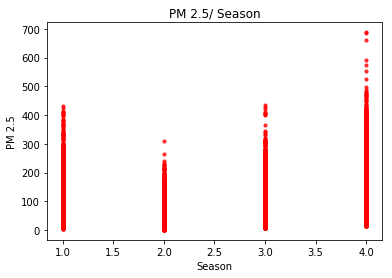

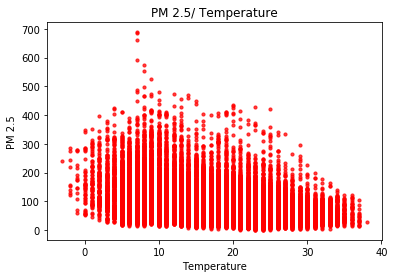

In [10]:
### Data pre-visualization ###

def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
scatterplot(df_pd["season"], df_pd["PM2.5"], 'Season', "PM 2.5", "PM 2.5/ Season")  
 
scatterplot(df_pd["TEMP"], df_pd["PM2.5"], "Temperature", 'PM 2.5', "PM 2.5/ Temperature")

### Verify the data quality

In [11]:
# Check the number of null value in each column
df_pd.isna().sum().sort_values(ascending= False)

PM_Caotangsi     28164
PM_Shahepu       27990
PM_US Post       23684
PM2.5            22082
Iprec             2955
precipitation     2955
HUMI               535
Iws                533
DEWP               529
TEMP               527
PRES               521
cbwd                 0
season               0
hour                 0
day                  0
month                0
year                 0
No                   0
dtype: int64

In [12]:
df_pd.describe()

,No,year,month,day,hour,season,PM_Caotangsi,PM_Shahepu,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec,PM2.5
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,24420.000000,24594.000000,28900.000000,52055.000000,52049.000000,52063.000000,52057.000000,52051.000000,49629.000000,49629.000000,30502.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,77.507002,75.555867,83.407612,12.274556,72.752887,1014.471659,17.698158,4.347582,0.080376,0.557900,90.087535
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,60.150955,60.337735,57.239585,7.531846,17.855731,8.122017,7.843607,6.423578,0.986758,5.071312,63.147986
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,-16.000000,12.000000,991.000000,-3.000000,0.000000,0.000000,0.000000,1.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,37.000000,35.000000,44.000000,6.000000,61.000000,1008.000000,11.000000,1.000000,0.000000,0.000000,47.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,60.000000,57.000000,68.000000,13.000000,77.000000,1014.000000,18.000000,2.000000,0.000000,0.000000,72.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,99.000000,97.000000,105.000000,19.000000,87.000000,1021.000000,24.000000,5.000000,0.000000,0.000000,114.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,662.000000,573.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,120.000000,57.000000,169.000000,688.000000


# Data Preparation
### Select and Clean the data

In [13]:
# filter out columns which we don't need any more and None value as well  
df_pd = df_pd.drop(["No", "PM_Caotangsi", "PM_Shahepu", "PM_US Post"], axis=1)
df_pd = df_pd.dropna()
print(df_pd.shape)
df_pd.head(1)

(28779, 14)


,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM2.5
20750,2012,5,14,14,1,4.0,24.0,1013.0,26.0,cv,2.0,0.0,0.0,46.0


### Second Visualisation after Cleaning the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15ffc44b38>,
      dtype=object)

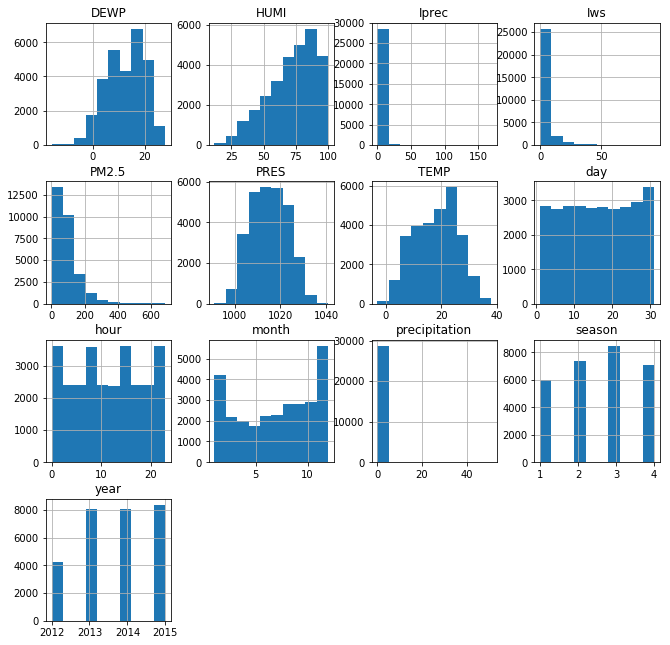

In [14]:
# check data quality by visualisation after cleaning
df_pd[df_pd.dtypes[(df_pd.dtypes=="float64")|(df_pd.dtypes=="int64")].index.values].hist(figsize=[11,11])

# Data Transformation
### Project the data

In [15]:
# check the data types of columns(parameters)
df_pd.dtypes

year               int64
month              int64
day                int64
hour               int64
season             int64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd              object
Iws              float64
precipitation    float64
Iprec            float64
PM2.5            float64
dtype: object

In [16]:
# Check the elements in the column named "cbwd"
print(pd.get_dummies(df_pd["cbwd"]).sum())

NE     3003
NW     5259
SE     1675
SW     5324
cv    13518
dtype: int64


In [17]:
# define a function to reclassify cbwd
def cbwd_tf(x):
    if x == 'cv':
        return 0
    elif x == 'NE':
        return 1
    elif x == 'NW':
        return 2
    elif x == 'SE':
        return 3
    elif x == 'SW':
        return 4
df_pd['cbwd'] = df_pd.apply(lambda x: cbwd_tf(x['cbwd']), axis = 1)

# Check the elements in the column named "cbwd" again
print(pd.get_dummies(df_pd["cbwd"]).sum())

0    13518
1     3003
2     5259
3     1675
4     5324
dtype: int64


### PM2.5 Reclassification 

In [18]:
# define a function to reclassity PM2.5
def pm_tf(a):
    if a<=50:
        return 1
    elif a>50 and a<=100:
        return 2
    elif a>100 and a<=150:
        return 3
    elif a>150:
        return 4
df_pd['PM2.5'] = df_pd.apply(lambda a: pm_tf(a['PM2.5']), axis = 1)

# Check the elements in the column 'PM2.5'
print(pd.get_dummies(df_pd['PM2.5']).sum())

1     8183
2    11396
3     4856
4     4344
dtype: int64


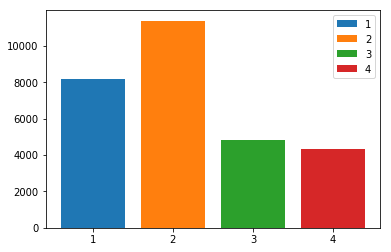

In [19]:
# Visualize the distribution in PM2.5
labels = []
for i, dfi in enumerate(df_pd.groupby(["PM2.5"])):
    labels.append(dfi[0])
    plt.bar(i, dfi[1].count(), label=dfi[0])
plt.xticks(range(len(labels)), labels)
plt.legend()
plt.show()

### Data Balance

In [20]:
# Quantity Statistics and Proportion Calculation

target_count = df_pd['PM2.5'].value_counts()
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
print(target_count.sum())
print('Proportion:', round(target_count[1]/28779,3) , ':',round(target_count[2]/28779,3) , ':',round(target_count[3]/28779,3) , ':',round(target_count[4]/28779,3))


Class 1: 8183
Class 2: 11396
Class 3: 4856
Class 4: 4344
28779
Proportion: 0.284 : 0.396 : 0.169 : 0.151


Random Under-Sampling:
4    4344
3    4344
2    4344
1    4344
Name: PM2.5, dtype: int64


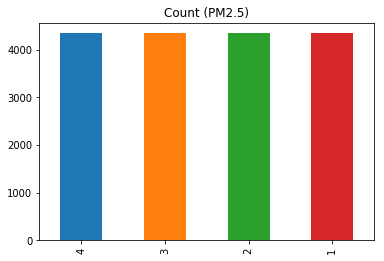

In [21]:
# Class count
count_class_1, count_class_2, count_class_3, count_class_4 = df_pd['PM2.5'].value_counts()

# Divide by class
df_class_1 = df_pd[df_pd['PM2.5'] == 1]
df_class_2 = df_pd[df_pd['PM2.5'] == 2]
df_class_3 = df_pd[df_pd['PM2.5'] == 3]
df_class_4 = df_pd[df_pd['PM2.5'] == 4]

df_class_3_under = df_class_3.sample(count_class_4,replace=True)
df_class_2_under = df_class_2.sample(count_class_4,replace=True)
df_class_1_under = df_class_1.sample(count_class_4,replace=True)
df_pd_balanced = pd.concat([df_class_1_under,df_class_2_under,df_class_3_under, df_class_4], axis=0)

print('Random Under-Sampling:')
print(df_pd_balanced['PM2.5'].value_counts())

df_pd_balanced['PM2.5'].value_counts().plot(kind='bar', title='Count (PM2.5)');

In [22]:
# Data statistics
df_pd_balanced['PM2.5'].value_counts().sum()

17376

### Converting the balanced dataset back to PySpark dataframe

In [23]:
#Check data types of the balanced dataset in pandas dataframe
df_pd_balanced.dtypes

year               int64
month              int64
day                int64
hour               int64
season             int64
DEWP             float64
HUMI             float64
PRES             float64
TEMP             float64
cbwd               int64
Iws              float64
precipitation    float64
Iprec            float64
PM2.5              int64
dtype: object

In [24]:
#Creat a new schema based on the columns' titles and types in pandas dataframe
from pyspark.sql.types import *

mySchema = StructType([ StructField("year", IntegerType(), True)\
                       ,StructField("month", IntegerType(), True)\
                       ,StructField("day", IntegerType(), True)\
                       ,StructField("hour", IntegerType(), True)\
                       ,StructField("season", IntegerType(), True)\
                       ,StructField("DEWP", FloatType(), True)\
                       ,StructField("HUMI", FloatType(), True)\
                       ,StructField("PRES", FloatType(), True)\
                       ,StructField("TEMP", FloatType(), True)\
                       ,StructField("cbwd", IntegerType(), True)\
                       ,StructField("Iws", FloatType(), True)\
                       ,StructField("precipitation", FloatType(), True)\
                       ,StructField("Iprec", FloatType(), True)\
                       ,StructField("PML", IntegerType(), True)])

df_spark = spark.createDataFrame(df_pd_balanced,schema=mySchema)

#Check if success or not
print("Total data points in Spark dataframe:", df_spark.count())
print("Total data points in Pandas dataframe:",df_pd_balanced['PM2.5'].value_counts().sum())
df_spark.show(1)
df_pd_balanced.head(1)


Total data points in Spark dataframe: 17376
Total data points in Pandas dataframe: 17376
+----+-----+---+----+------+----+----+------+----+----+----+-------------+-----+---+
|year|month|day|hour|season|DEWP|HUMI|  PRES|TEMP|cbwd| Iws|precipitation|Iprec|PML|
+----+-----+---+----+------+----+----+------+----+----+----+-------------+-----+---+
|2012|    7| 10|   0|     2|22.0|83.0|1004.0|25.0|   2|19.0|          0.0|  0.0|  1|
+----+-----+---+----+------+----+----+------+----+----+----+-------------+-----+---+
only showing top 1 row



,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM2.5
22104,2012,7,10,0,2,22.0,83.0,1004.0,25.0,2,19.0,0.0,0.0,1


# Data Mining Method/Algorithm Selection
### Check Correlations

In [25]:
round(df_pd_balanced.corr(),3)

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec,PM2.5
year,1.000,-0.238,-0.001,-0.001,-0.088,-0.056,-0.083,0.061,-0.011,-0.011,0.021,-0.001,0.004,-0.151
month,-0.238,1.000,0.018,0.005,0.170,0.242,0.212,0.087,0.118,-0.025,-0.046,0.013,0.025,-0.190
day,-0.001,0.018,1.000,-0.008,-0.013,0.021,-0.010,-0.004,0.024,-0.035,-0.022,-0.012,-0.019,0.068
hour,-0.001,0.005,-0.008,1.000,-0.002,-0.042,-0.366,-0.053,0.163,0.098,0.175,-0.006,-0.008,-0.083
season,-0.088,0.170,-0.013,-0.002,1.000,-0.495,0.212,0.558,-0.619,-0.107,-0.097,-0.045,-0.038,0.329
DEWP,-0.056,0.242,0.021,-0.042,-0.495,1.000,0.273,-0.727,0.820,0.087,0.023,0.105,0.119,-0.372
HUMI,-0.083,0.212,-0.010,-0.366,0.212,0.273,1.000,0.091,-0.315,-0.102,-0.135,0.073,0.110,0.112
PRES,0.061,0.087,-0.004,-0.053,0.558,-0.727,0.091,1.000,-0.773,-0.085,-0.094,-0.097,-0.101,0.277
TEMP,-0.011,0.118,0.024,0.163,-0.619,0.820,-0.315,-0.773,1.000,0.145,0.101,0.064,0.060,-0.437
cbwd,-0.011,-0.025,-0.035,0.098,-0.107,0.087,-0.102,-0.085,0.145,1.000,0.227,0.011,0.007,-0.128


In [26]:
# Check the correlations of PM2.5
print('Correlations:')
print('PM2.5/year:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['year']),3))
print('PM2.5/month:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['month']),3))
print('PM2.5/day:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['day']),3))
print('PM2.5/hour:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['hour']),3))
print('PM2.5/season:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['season']),3))
print('PM2.5/DEWP:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['DEWP']),3))
print('PM2.5/HUMI:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['HUMI']),3))
print('PM2.5/PRES:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['PRES']),3))
print('PM2.5/TEMP:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['TEMP']),3))
print('PM2.5/cbwd:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['cbwd']),3))
print('PM2.5/Iws:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['Iws']),3))
print('PM2.5/precipitation:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['precipitation']),3))
print('PM2.5/Iprec:',round(df_pd_balanced['PM2.5'].corr(df_pd_balanced['Iprec']),3))

Correlations:
PM2.5/year: -0.151
PM2.5/month: -0.19
PM2.5/day: 0.068
PM2.5/hour: -0.083
PM2.5/season: 0.329
PM2.5/DEWP: -0.372
PM2.5/HUMI: 0.112
PM2.5/PRES: 0.277
PM2.5/TEMP: -0.437
PM2.5/cbwd: -0.128
PM2.5/Iws: -0.219
PM2.5/precipitation: -0.078
PM2.5/Iprec: -0.115


### Select relvent features

In [27]:
df_dm = df_spark.select('season', 'DEWP', 'PRES','TEMP','Iws','PML')
df_dm.printSchema()

root
 |-- season: integer (nullable = true)
 |-- DEWP: float (nullable = true)
 |-- PRES: float (nullable = true)
 |-- TEMP: float (nullable = true)
 |-- Iws: float (nullable = true)
 |-- PML: integer (nullable = true)



# Data Mining

#### Create VectorAssembler

In [28]:
# Import VectorAssembler and Vectors
from pyspark.ml.feature import VectorAssembler

# The input columns are the feature column names, and the output column is what you'd like the new column to be named. 
vector_assembler = VectorAssembler(inputCols = ['season', 'DEWP', 'PRES', 'TEMP', 'Iws'], outputCol = 'features')

# Transform the data.
vector_output = vector_assembler.transform(df_dm)

# Using print schema, see the features output column has been added. 
vector_output.printSchema()

# See that the features column is a DenseVector that combines the various features as expected.
vector_output.head(1)

root
 |-- season: integer (nullable = true)
 |-- DEWP: float (nullable = true)
 |-- PRES: float (nullable = true)
 |-- TEMP: float (nullable = true)
 |-- Iws: float (nullable = true)
 |-- PML: integer (nullable = true)
 |-- features: vector (nullable = true)



[Row(season=2, DEWP=22.0, PRES=1004.0, TEMP=25.0, Iws=19.0, PML=1, features=DenseVector([2.0, 22.0, 1004.0, 25.0, 19.0]))]

#### Feature Selection

In [29]:
# Check vector_output
vector_output = vector_output.selectExpr('season as season', 'DEWP as DEWP', 'PRES as PRES', 'TEMP as TEMP', 'Iws as Iws','features as features',"PML as label")
# Check the dataframe now only contains two columns. 
print(vector_output.head(1))
vector_output.show(3)

[Row(season=2, DEWP=22.0, PRES=1004.0, TEMP=25.0, Iws=19.0, features=DenseVector([2.0, 22.0, 1004.0, 25.0, 19.0]), label=1)]
+------+----+------+----+----+--------------------+-----+
|season|DEWP|  PRES|TEMP| Iws|            features|label|
+------+----+------+----+----+--------------------+-----+
|     2|22.0|1004.0|25.0|19.0|[2.0,22.0,1004.0,...|    1|
|     2|20.0|1007.0|22.0| 3.0|[2.0,20.0,1007.0,...|    1|
|     3|13.0|1020.0|13.0| 3.0|[3.0,13.0,1020.0,...|    1|
+------+----+------+----+----+--------------------+-----+
only showing top 3 rows



#### Split dataset

In [30]:
# Do a randomised 70/30 split
train_data,test_data = vector_output.randomSplit([0.7,0.3])
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))

Training Dataset Count: 12220
Test Dataset Count: 5156


### Linear Regression

In [31]:
# Importing the LR package.
from pyspark.ml.regression import LinearRegression

# Instantiate the instance.
lr = LinearRegression(featuresCol='features', labelCol='label')

# Fit the training data.
lr_model = lr.fit(train_data)

In [32]:
# Print the coefficients.
print("Coefficients: " + str(lr_model.coefficients),4)
# Print the intercept.
print("Intercept: " + str(lr_model.intercept) + "\n")

# Summarise the model and print out some evaluation metrics.
training_summary = lr_model.summary
# Squared Error
print("MSE = %s" % training_summary.meanSquaredError)
print("RMSE = %s" % training_summary.rootMeanSquaredError)
# R-squared
print("R-squared = %s" % training_summary.r2)
# Mean absolute error
print("MAE = %s" % training_summary.meanAbsoluteError)
# Explained variance
print("Explained variance = %s" % training_summary.explainedVariance)


Coefficients: [0.12055841944475999,-0.019632717899984668,-0.030966734285666937,-0.05878805155637103,-0.03450848213053406] 4
Intercept: 34.98776313378252

MSE = 0.9362774858574213
RMSE = 0.967614327021578
R-squared = 0.2474270667638363
MAE = 0.8122787397706893
Explained variance = 0.3078245067979445


In [33]:
# Evaluate the model against the test data.
test_results = lr_model.evaluate(test_data)

# Evaluation against the test data
print("MSE on test data:" + str(test_results.meanSquaredError))
print("RMSE on test data: " + str(test_results.rootMeanSquaredError))
print("R2 on test data: " + str(test_results.r2))
print("MAE on test data: " + str(test_results.meanAbsoluteError))
print("Explained variance on test data: " + str(test_results.explainedVariance))

MSE on test data:0.9620147187252588
RMSE on test data: 0.9808234900965916
R2 on test data: 0.23887053124472446
MAE on test data: 0.8265650203383832
Explained variance on test data: 0.29899331589901856


### Multi-Classification
### Mulitcalss Logistic Regression

In [34]:
# Import evaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator()

In [35]:
from pyspark.ml.classification import LogisticRegression

mlr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=10)
mlr_model = mlr.fit(train_data)

##### Evaluate Logistic Regression

In [36]:
predictions_mlr = mlr_model.transform(test_data)
predictions_mlr.select('features','label').show(10)

print('Test Area Under ROC', evaluator.evaluate(predictions_mlr))

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[1.0,-5.0,1013.0,...|    2|
|[1.0,-5.0,1013.0,...|    2|
|[1.0,-5.0,1016.0,...|    2|
|[1.0,-4.0,1014.0,...|    2|
|[1.0,-2.0,1020.0,...|    1|
|[1.0,-2.0,1020.0,...|    1|
|[1.0,-2.0,1024.0,...|    2|
|[1.0,-1.0,1008.0,...|    4|
|[1.0,-1.0,1012.0,...|    4|
|[1.0,-1.0,1018.0,...|    3|
+--------------------+-----+
only showing top 10 rows

Test Area Under ROC 0.37308684193418096


### Decision Tree Classifier

In [37]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train_data)
predictions_dt = dtModel.transform(test_data)
predictions_dt.select('season', 'DEWP', 'PRES', 'TEMP', 'Iws', 'label').show(10)

+------+----+------+----+----+-----+
|season|DEWP|  PRES|TEMP| Iws|label|
+------+----+------+----+----+-----+
|     1|-5.0|1013.0|13.0| 8.0|    2|
|     1|-5.0|1013.0|13.0| 8.0|    2|
|     1|-5.0|1016.0|16.0| 2.0|    2|
|     1|-4.0|1014.0|17.0| 2.0|    2|
|     1|-2.0|1020.0|13.0| 2.0|    1|
|     1|-2.0|1020.0|13.0| 2.0|    1|
|     1|-2.0|1024.0|15.0| 3.0|    2|
|     1|-1.0|1008.0|25.0| 4.0|    4|
|     1|-1.0|1012.0|23.0| 6.0|    4|
|     1|-1.0|1018.0|24.0|15.0|    3|
+------+----+------+----+----+-----+
only showing top 10 rows



##### Evaluate Decision Tree

In [38]:
evaluator_dt = MulticlassClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator_dt.evaluate(predictions_dt, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.3855352228203954


### Random Forest Classifier

In [39]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label')
rfModel = rf.fit(train_data)
predictions_rf = rfModel.transform(test_data)
predictions_rf.select('season', 'DEWP', 'PRES', 'TEMP', 'Iws', 'label').show(10)

+------+----+------+----+----+-----+
|season|DEWP|  PRES|TEMP| Iws|label|
+------+----+------+----+----+-----+
|     1|-5.0|1013.0|13.0| 8.0|    2|
|     1|-5.0|1013.0|13.0| 8.0|    2|
|     1|-5.0|1016.0|16.0| 2.0|    2|
|     1|-4.0|1014.0|17.0| 2.0|    2|
|     1|-2.0|1020.0|13.0| 2.0|    1|
|     1|-2.0|1020.0|13.0| 2.0|    1|
|     1|-2.0|1024.0|15.0| 3.0|    2|
|     1|-1.0|1008.0|25.0| 4.0|    4|
|     1|-1.0|1012.0|23.0| 6.0|    4|
|     1|-1.0|1018.0|24.0|15.0|    3|
+------+----+------+----+----+-----+
only showing top 10 rows



##### Evaluate Random Forest

In [40]:
evaluator_rf = MulticlassClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator_rf.evaluate(predictions_rf, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.4609641722399163


### Results Visualization
#### Linear Regression - Beta Coefficients

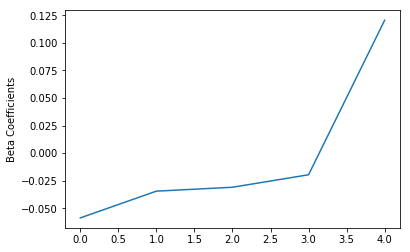

In [41]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(lr_model.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

#### AUC of Random Forest

In [42]:
evaluator_rf = MulticlassClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator_rf.evaluate(predictions_rf, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.4609641722399163
